In [2]:
# print name, id
print('Name: Nicholas Zhang')
print('Email: nzhang36@jhu.edu')
print('Github ID: nickyz4')
print('JHED: nzhang36')

Name: Nicholas Zhang
Email: nzhang36@jhu.edu
Github ID: nickyz4
JHED: nzhang36


# Question 1

--2019-09-19 20:11:27--  https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/orings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 357 [text/plain]
Saving to: ‘orings.csv’

orings.csv          100%[===================>]     357  --.-KB/s    in 0s      

2019-09-19 20:11:27 (66.8 MB/s) - ‘orings.csv’ saved [357/357]



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Probability of o-ring failure with temperature of 74 degrees is 0.107061826026118


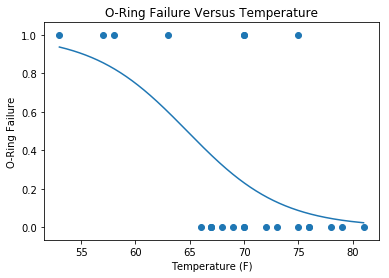

In [3]:
### Question 1

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
import statsmodels as sm









# Load challenger o ring data
! if [ ! -e oasis.csv ]; \
then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/orings.csv; \
fi;
    
# Read in the data and display a few rows
data = pd.read_csv("orings.csv")

## part a: Plot whether there was any o-ring failure (total > 0) versus temperature.
temp = data['Temperature']
fail = data['Total'] > 0

# convert to values
temp = temp.values
temp = temp.reshape(-1, 1)
fail = fail.values
fail = fail.reshape(-1, 1)

## part b: Fit a logistic regression curve of o-ring failure (outcome) versus temperature.
# fit 
lr = lm.LogisticRegression(fit_intercept = True, solver = 'lbfgs')
fit = lr.fit(temp, fail)

# intercept parameters
beta0, beta1 = [fit.intercept_[0], fit.coef_[0][0]]
[beta0, beta1]

## part c: Plot the estimated sigmoid curve from the logistic regression fit on your plot from a.
n = 1000
xplot = np.linspace(min(temp), max(temp), n)
eta = beta0 + beta1 * xplot
p = 1 / (1 + np.exp(-eta))

# plot
plt.figure()
plt.scatter(temp, fail)
plt.plot(xplot, p)
plt.xlabel('Temperature (F)')
plt.ylabel('O-Ring Failure')
plt.title('O-Ring Failure Versus Temperature')

## part d: A new oring has a temperature of 74 degrees. What is the estimated probability of failure from your model?
tempPoint = 74
eta = beta0 + beta1 * tempPoint
p = 1 / (1 + np.exp(-eta))
print('Probability of o-ring failure with temperature of 74 degrees is ' + str(p))

# Question 2

### Given logistic regression model

$$ P(Y_i = 1 | X_i) = \frac{e^{\beta_0(1 - X_i) + \beta_1 X_i}} {1 + e^{\beta_0 (1 - X_i) + \beta_1 X_i}} $$

## Part a: log likelihood

$$ \ln {P(Y_i = 1 | X_i)} = \ln (\prod_{i = 1}^{n} \frac{e^{\beta_0(1 - X_i) + \beta_1 X_i}} {1 + e^{\beta_0 (1 - X_i) + \beta_1 X_i}}) ^ {y_i} \frac{1} {1 + e^{\beta_0 (1 - X_i) + \beta_1 X_i}}) ^ {1 - y_i})$$

$$ = \sum_{i = 1} ^ {n} y_i [\beta_0 (1 - x_i) + \beta_1] - y_i \ln [1 + e^{\beta_0 (1 - X_i) + \beta_1 X_i}] + (1 - y_i) [- \ln (1 + e^{\beta_0 (1 - X_i) + \beta_1 X_i})]$$

$$ = \sum_{i = 1} ^ {n} (y_i [\beta_0  + \beta_1] - y_i \ln [1 + e^{\beta_0 (1 - X_i) + \beta_1 X_i}] + (1 - y_i) [- \ln (1 + e^{\beta_0 (1 - X_i) + \beta_1 X_i})])$$

$$ = \sum_{i = 1}^{n} y_i \beta_0(1 - X_i) + y_i \beta_1 X_i - \ln (1 + e^{\beta_0 (1-X_i) + \beta_1 X_i}) $$

Thus the log(likelihood) becomes: 

$$ = \sum_{i = 1}^{n} y_i \beta_0(1 - X_i) + \sum_{i = 1}^{n} y_i \beta_1 X_i - \sum_{i = 1}^{n} \ln (1 + e^{\beta_0 (1-X_i) + \beta_1 X_i}) $$

## Part b: split log likelihood

### Case 1: $ X_i = 0 $

$$ log(likelihood) = \sum_{i = 1}^{n} y_i \beta_0 -\sum_{i = 1}^{n} \ln [1 + e^{\beta_0}] $$

$$ = n \bar{y_0} - n \ln [1 + e^{\beta_0}] $$

### Case 2: $ X_i = 1 $

$$ log(likelihood) = \sum_{i = 1}^{n} y_i \beta_1 -\sum_{i = 1}^{n} \ln [1 + e^{\beta_1}] $$

$$ = n \bar{y_1} - n \ln [1 + e^{\beta_1}] $$

## Part c: maximum of log likelihood = maximum of likelihood

### Case 1: $ X_i = 0 $

$$ \frac{\partial}{\partial{\beta_0}} log(likelihood) = n \bar{y_0} - n \frac{e^{\hat{\beta_0}}}{1 + e^{\hat{\beta_0}}} = 0 $$

$$ => \bar{y_0} = \frac{e^{\hat{\beta_0}}}{1 + e^{\hat{\beta_0}}} $$ 

$$ \bar{y_0} (1 + e^{\hat{\beta_0}}) = e^{\hat{\beta_0}} $$ 

$$ \bar{y_0} + \bar{y_0} e^{\hat{\beta_0}} = e^{\hat{\beta_0}} $$ 

$$ \bar{y_0} = e^{\hat{\beta_0}} (1 - \bar{y_0}) $$ 

$$ \ln \bar{y_0} = \beta_0 + \ln (1 - \bar{y_0}) $$

$$ \hat{\beta_0} = \ln \frac{\bar{y_0}}{1 - \bar{y_0}} $$


### Case 2: $ X_i = 1 $

$$ \frac{\partial}{\partial{\beta_1}} log(likelihood) = n \bar{y_1} - n \frac{e^{\hat{\beta_1}}}{1 + e^{\hat{\beta_1}}} = 0 $$

$$ => \bar{y_1} = \frac{e^{\hat{\beta_0}}}{1 + e^{\hat{\beta_0}}} $$ 

$$ \bar{y_1} (1 + e^{\hat{\beta_1}}) = e^{\hat{\beta_1}} $$ 

$$ \bar{y_1} + \bar{y_1} e^{\hat{\beta_1}} = e^{\hat{\beta_1}} $$ 

$$ \bar{y_1} = e^{\hat{\beta_1}} (1 - \bar{y_1}) $$ 

$$ \ln \bar{y_1} = \beta_1 + \ln (1 - \bar{y_1}) $$

$$ \hat{\beta_1} = \ln \frac{\bar{y_1}}{1 - \bar{y_1}} $$

# Question 3



In [12]:
# print out dataset for anlysis

# Load challenger o ring data
! if [ ! -e shootings.csv ]; \
then wget https://raw.githubusercontent.com/nickyz4/BME_data_science/master/shootings.csv; \
fi;
    
# Read in the data and display a few rows
data = pd.read_csv("shootings.csv", encoding = 'latin1')
data.head(10)

,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,NaN,58,515,573,Unclear,NaN,NaN,NaN,NaN
1,2,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Yes,Asian,M,NaN,NaN
2,3,Pennsylvania supermarket shooting,"Tunkhannock, PA",6/7/2017,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,Unclear,White,M,NaN,NaN
3,4,Florida awning manufacturer shooting,"Orlando, Florida",6/5/2017,"John Robert Neumann, Jr., 45, a former employe...",5,0,5,Unclear,NaN,M,NaN,NaN
4,5,Rural Ohio nursing home shooting,"Kirkersville, Ohio",5/12/2017,"Thomas Hartless, 43, shot and killed a former ...",3,0,3,Yes,White,M,NaN,NaN
5,6,Fresno downtown shooting,"Fresno, California",4/18/2017,"Kori Ali Muhammad, 39, opened fire along a str...",3,0,3,Unclear,Black,M,NaN,NaN
6,7,Fort Lauderdale airport shooting,"Fort Lauderdale, Florida",1/6/2017,"Esteban Santiago, 26, flew from Alaska to Fort...",5,6,11,Yes,Latino,M,NaN,NaN
7,8,Cascade Mall shooting,"Burlington, WA",9/23/2016,"Arcan Cetin, 20, killed a teen girl and three ...",5,0,5,Yes,NaN,M,NaN,NaN
8,9,Baton Rouge police shooting,"Baton Rouge, LA",7/17/2016,"Gavin Long, a former Marine who served in Iraq...",3,3,6,Yes,Black,M,NaN,NaN
9,10,Dallas police shooting,"Dallas, Texas",7/7/2016,"Micah Xavier Johnson, a 25-year-old Army veter...",5,11,16,Unclear,Black,M,NaN,NaN
